# Training Neural Network 

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

MyReLu 클래스에서 PyTorch의 autograd.Function을 이용해 forward와 backward의 함수를 정의

In [2]:
class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_y):
        x, = ctx.saved_tensors
        grad_input = grad_y.clone()
        grad_input[x < 0] = 0
        return grad_input

In [3]:
def my_relu(x):
    return MyReLU.apply(x)

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [5]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

In [6]:
learning_rate = 1e-6

In [7]:
x_list = []
loss_list = []

In [8]:
for t in range(500):
    y_pred = my_relu(x.mm(w1)).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    
    
    print("[*] t idx : ", t, " loss : ", loss.item())
    
    x_list.append(t)
    loss_list.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

[*] t idx :  0  loss :  29859616.0
[*] t idx :  1  loss :  26786960.0
[*] t idx :  2  loss :  27497836.0
[*] t idx :  3  loss :  27792660.0
[*] t idx :  4  loss :  25050772.0
[*] t idx :  5  loss :  18959600.0
[*] t idx :  6  loss :  12174355.0
[*] t idx :  7  loss :  6951959.0
[*] t idx :  8  loss :  3853560.25
[*] t idx :  9  loss :  2229607.75
[*] t idx :  10  loss :  1409189.125
[*] t idx :  11  loss :  980051.875
[*] t idx :  12  loss :  737555.6875
[*] t idx :  13  loss :  586355.375
[*] t idx :  14  loss :  482753.84375
[*] t idx :  15  loss :  406240.15625
[*] t idx :  16  loss :  346710.59375
[*] t idx :  17  loss :  298711.0
[*] t idx :  18  loss :  259155.40625
[*] t idx :  19  loss :  226130.578125
[*] t idx :  20  loss :  198210.421875
[*] t idx :  21  loss :  174449.296875
[*] t idx :  22  loss :  154092.703125
[*] t idx :  23  loss :  136548.90625
[*] t idx :  24  loss :  121377.484375
[*] t idx :  25  loss :  108216.0390625
[*] t idx :  26  loss :  96733.453125
[*] t id

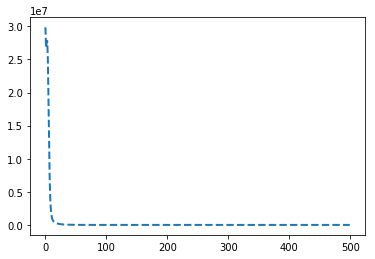

In [9]:
plt.plot(x_list, loss_list, "--", linewidth=2, label="loss")
plt.show()